In [84]:
import pandas as pd
import numpy as np
netflix = pd.read_csv("C:\\netflix.csv")
netflix = netflix[['title', 'country', 'year_added']]
netflix.head()

,title,country,year_added
0,3%,Brazil,2020
1,7:19,Mexico,2016
2,23:59,Singapore,2018
3,9,United States,2017
4,21,United States,2020


In [87]:
asia = ['South Korea', 'India', 'China', 'Japan']

In [51]:
netflix["country"].value_counts().head(10)

United States     2555
India              923
United_states      507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

In [106]:
netflix["asia"] = netflix["country"].apply(lambda x: 1 if x in asia else 0)
netflix["Korea"] = netflix["country"].apply(lambda x: 1 if x == 'South Korea' else 0)
netflix["Japan"] = netflix["country"].apply(lambda x: 1 if x == 'Japan' else 0)
netflix["India"] = netflix["country"].apply(lambda x: 1 if x == 'India' else 0)
netflix["China"] = netflix["country"].apply(lambda x: 1 if x =='China' else 0)
netflix["total"] = 1

netflix['asia_pct'] = netflix['asia'].cumsum() / netflix['total'].cumsum()
netflix['korea_pct'] = netflix['Korea'].cumsum() / netflix['total'].cumsum()
netflix['india_pct'] = netflix['India'].cumsum() / netflix['total'].cumsum()
netflix.head(10)

,title,country,year_added,asia,Korea,Japan,India,China,total,asia_pct,korea_pct,india_pct
0,3%,Brazil,2020,0,0,0,0,0,1,0.000000,0.0,0.000000
1,7:19,Mexico,2016,0,0,0,0,0,1,0.000000,0.0,0.000000
2,23:59,Singapore,2018,0,0,0,0,0,1,0.000000,0.0,0.000000
3,9,United States,2017,0,0,0,0,0,1,0.000000,0.0,0.000000
4,21,United States,2020,0,0,0,0,0,1,0.000000,0.0,0.000000
5,46,Turkey,2017,0,0,0,0,0,1,0.000000,0.0,0.000000
6,122,Egypt,2020,0,0,0,0,0,1,0.000000,0.0,0.000000
7,187,United States,2019,0,0,0,0,0,1,0.000000,0.0,0.000000
8,706,India,2019,1,0,0,1,0,1,0.111111,0.0,0.111111
9,1920,India,2017,1,0,0,1,0,1,0.200000,0.0,0.200000


Проверка гипотезы про паразитов и корейское кино в 2019 году. Нулевая гипотеза - номинация "Паразитов" на оскар не повлиял на увеличение количества корейских фильмов в 2019.

In [119]:
sk_mean = netflix['Korea'].mean()
sk_mean

0.023500706305380762

In [121]:
sk_2019_mean = netflix.loc[netflix['year_added'] == 2019, 'Korea'].mean()
sk_2019_mean

0.026814609338881183

In [124]:
sk_2019_mean_std = np.std(netflix.loc[netflix['year_added'] == 2019, 'Korea'])
sk_2019_mean_std

0.16154128285018596

In [125]:
sk_2019_n = netflix.loc[netflix['year_added'] == 2019, 'Korea'].sum()
sk_2019_n

58

In [127]:
t_sk_2019 = (sk_2019_mean - sk_mean) * np.sqrt(sk_2019_n) / sk_2019_mean_std
t_sk_2019

0.15623209840037666

t критическое для таких значений = 2,002 > 0.156. Нулевая гипотеза не отвергается

Проверка Индии. Нулевая - расширение на индийский рынок в 2018 не увеличило кол-во индийский фильмов на площадке.

In [120]:
indi_mean = netflix['India'].mean()
indi_mean

0.11853088480801335

In [128]:
indi_2018_mean = netflix.loc[netflix['year_added'] == 2018, 'India'].mean()
indi_2018_mean

0.20178041543026706

In [129]:
indi_2018_mean_std = np.std(netflix.loc[netflix['year_added'] == 2018, 'India'])
indi_2018_mean_std

0.40132914095422806

In [132]:
indi_2018_n = netflix.loc[netflix['year_added'] == 2018, 'India'].sum()
indi_2018_n

340

In [135]:
t_indi_2018 = (indi_2018_mean - indi_mean) * np.sqrt(indi_2018_n) / indi_2018_mean_std
t_indi_2018

3.8249041512197106

t критическое для таких значений ~ 1,967 < 3.82. Нулевая гипотеза отвергается.

In [123]:
by_years = netflix.groupby('year_added').sum()
by_years['asia_pct'] = by_years['asia'] / by_years['total']
by_years['korea_pct'] = by_years['Korea'] / by_years['total']
by_years['india_pct'] = by_years['India'] / by_years['total']
by_years.reset_index(inplace=True)
by_years

,year_added,asia,Korea,Japan,India,China,total,asia_pct,korea_pct,india_pct
0,2008,0,0,0,0,0,2,0.000000,0.000000,0.000000
1,2009,0,0,0,0,0,2,0.000000,0.000000,0.000000
2,2010,0,0,0,0,0,1,0.000000,0.000000,0.000000
3,2011,0,0,0,0,0,13,0.000000,0.000000,0.000000
4,2012,0,0,0,0,0,3,0.000000,0.000000,0.000000
5,2013,0,0,0,0,0,11,0.000000,0.000000,0.000000
6,2014,0,0,0,0,0,25,0.000000,0.000000,0.000000
7,2015,1,0,1,0,0,88,0.011364,0.000000,0.000000
8,2016,40,9,17,11,3,443,0.090293,0.020316,0.024831
9,2017,233,41,35,143,14,1225,0.190204,0.033469,0.116735


In [113]:
by_years = by_years[by_years['year_added'] > 2014]
by_years

,year_added,asia,Korea,Japan,India,China,total,asia_pct,korea_pct,india_pct
7,2015,1,0,1,0,0,88,0.011364,0.000000,0.000000
8,2016,40,9,17,11,3,443,0.090293,0.020316,0.024831
9,2017,233,41,35,143,14,1225,0.190204,0.033469,0.116735
10,2018,421,25,39,340,17,1685,0.249852,0.014837,0.201780
11,2019,363,58,63,225,17,2163,0.167822,0.026815,0.104022
12,2020,317,49,70,192,6,2009,0.157790,0.024390,0.095570
13,2021,14,1,1,12,0,117,0.119658,0.008547,0.102564


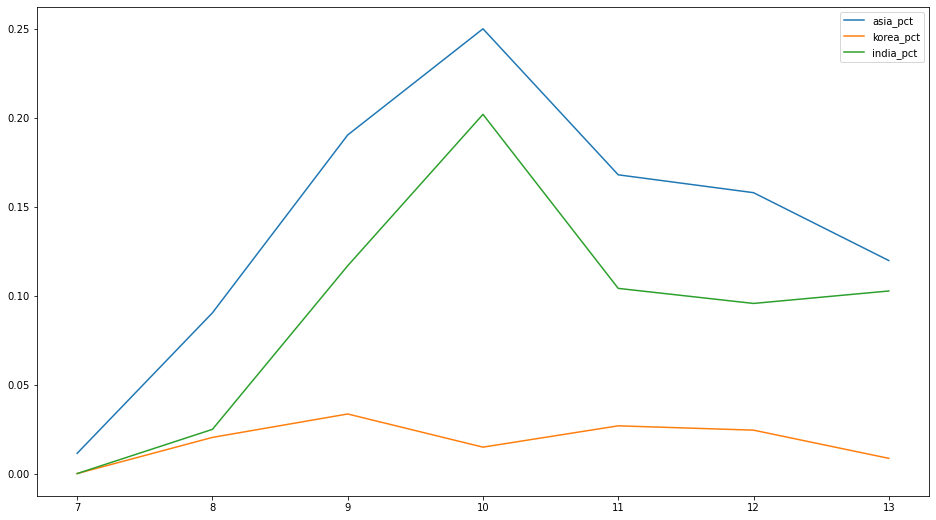

In [118]:
by_years[['asia_pct', 'korea_pct', 'india_pct']].plot(figsize=(16, 9))